In [34]:
# Import th∆∞ vi·ªán
import imageio
import joblib as jlb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus as pdp
import seaborn as sbn
import os

from IPython.display import Image
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

In [35]:
# C·∫•u h√¨nh ƒë∆∞·ªùng d·∫´n
folder = "../"
output_dir = folder + "Output"

# T·∫°o th∆∞ m·ª•c n·∫øu ch∆∞a c√≥
os.makedirs(output_dir, exist_ok=True)

In [36]:
# Chu·∫©n b·ªã d·ªØ li·ªáu
data = pd.read_csv(folder + '../Data/Social_Network_Ads.csv')
print(data.head())
print("=========================================================")
print(data.info())

print("=========================================================")

x = data.drop(['User ID', 'EstimatedSalary_K', 'Purchased'], axis=1)
print(x.head())

print("=======================================================")

y = data.Purchased
print(y.head())

print("=======================================================")

print("C√°c nh√£n (classes):", y.unique())

    User ID  Gender  Age  EstimatedSalary  EstimatedSalary_K  Purchased
0  15624510    Male   19            19000                 19          0
1  15810944    Male   35            20000                 20          0
2  15668575  Female   26            43000                 43          0
3  15603246  Female   27            57000                 57          0
4  15804002    Male   19            76000                 76          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            400 non-null    int64 
 1   Gender             400 non-null    object
 2   Age                400 non-null    int64 
 3   EstimatedSalary    400 non-null    int64 
 4   EstimatedSalary_K  400 non-null    int64 
 5   Purchased          400 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 18.9+ KB
None
   Gender  Age  EstimatedSalary


In [37]:
# Chuy·ªÉn Gender th√†nh ki·ªÉu Numerical
sex = {'Male':1, 'Female':0}
x['Male'] = [sex[i] for i in data.Gender]
x  = x.drop(['Gender'], axis = 1)

print(pd.concat([x, y], axis = 1).head())

   Age  EstimatedSalary  Male  Purchased
0   19            19000     1          0
1   35            20000     1          0
2   26            43000     0          0
3   27            57000     0          0
4   19            76000     1          0


In [38]:
# Chia train/test 80/20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)
print(f"Train: {x_train.shape}, Test: {x_test.shape}")

Train: (320, 3), Test: (80, 3)


In [39]:
# X√¢y d·ª±ng m√¥ h√¨nh Decision Tree (gi·ªØ tham s·ªë m·∫∑c ƒë·ªãnh)
clf = DecisionTreeClassifier()
model = clf.fit(x_train, y_train)

In [40]:
# L∆∞u m√¥ h√¨nh
mdl_path = os.path.join(output_dir, 'DecisionTree_Sna.mdl')
jlb.dump(model, mdl_path)
print(f"ƒê√£ l∆∞u m√¥ h√¨nh: {mdl_path}")

ƒê√£ l∆∞u m√¥ h√¨nh: ../Output\DecisionTree_Sna.mdl


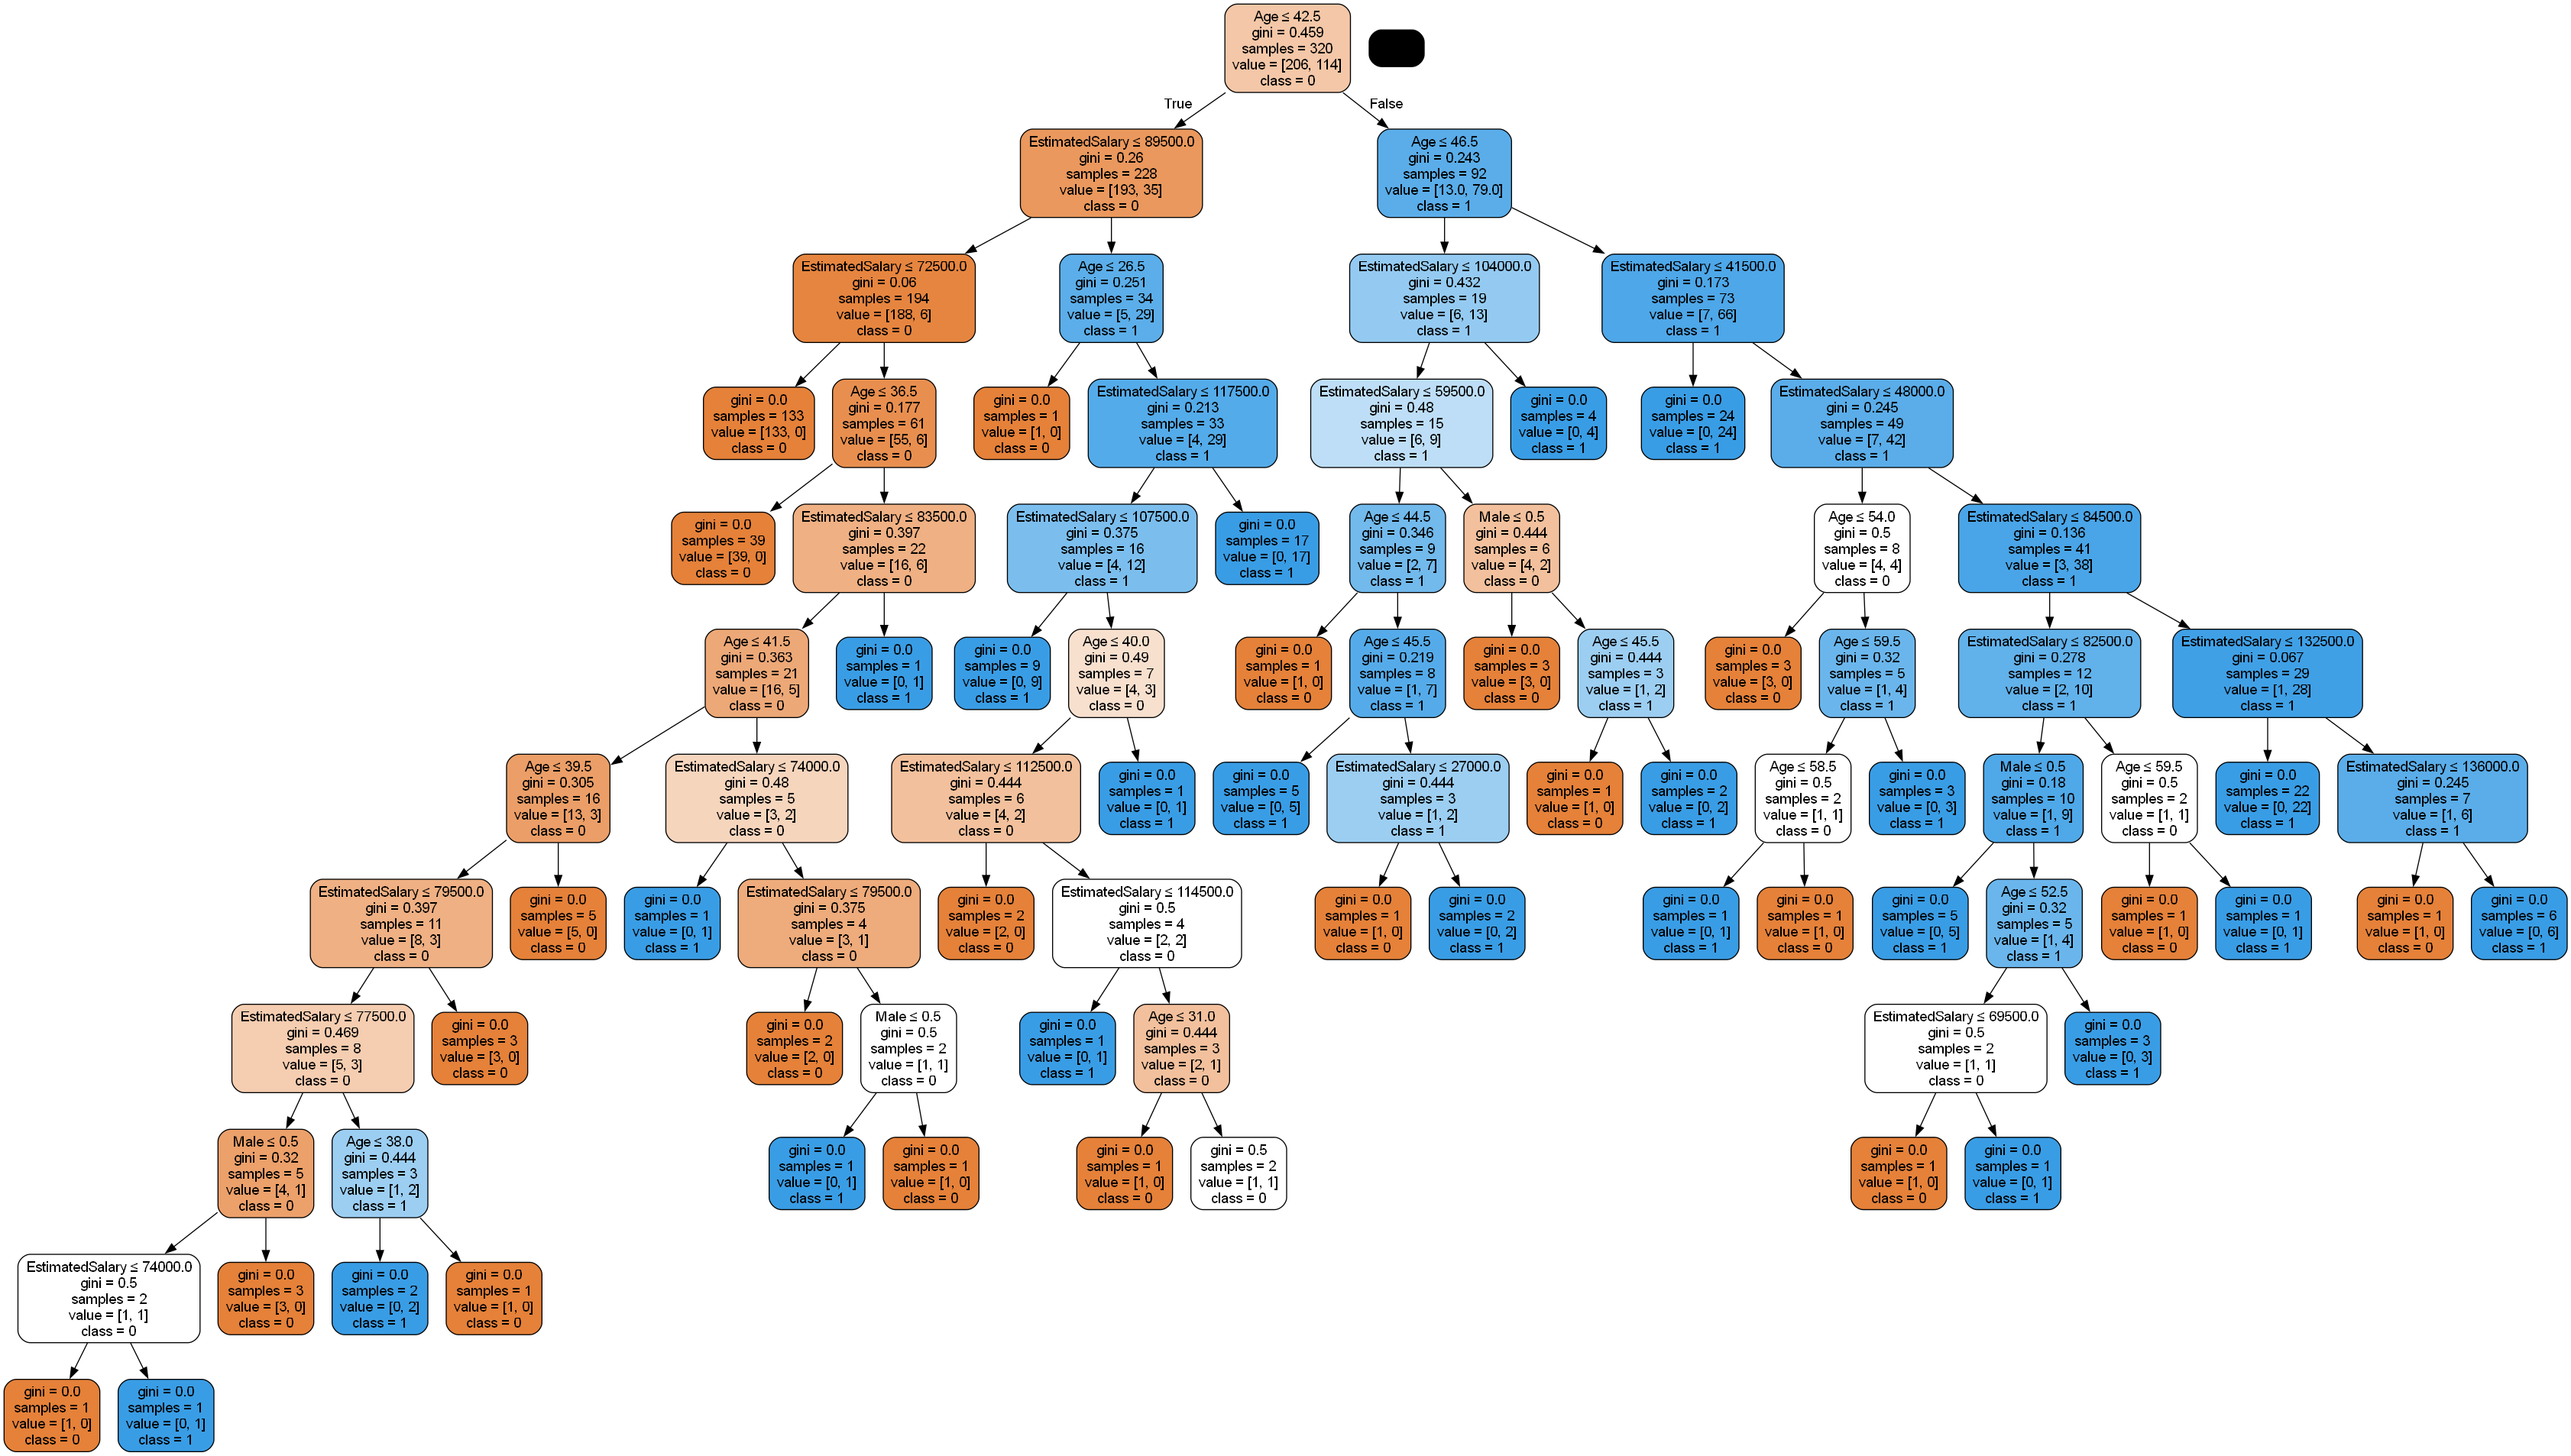

In [41]:
# ----------------------------------------------------------
# 5. Xu·∫•t & hi·ªÉn th·ªã c√¢y quy·∫øt ƒë·ªãnh (graphviz + pydotplus)
# ----------------------------------------------------------
dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=x.columns,
    class_names=np.unique(y).astype(str),
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pdp.graph_from_dot_data(dot_data)

png_path = os.path.join(output_dir, "DecisionTree_Sna.png")
pdf_path = os.path.join(output_dir, "DecisionTree_Sna.pdf")

# ghi file
graph.write_png(png_path)
graph.write_pdf(pdf_path)

# (T√πy m√¥i tr∆∞·ªùng, Image(...) c√≥ th·ªÉ hi·ªÉn th·ªã trong notebook)
try:
    display(Image(graph.create_png()))
except Exception:
    print(f"ƒê√£ xu·∫•t c√¢y xu·ªëng: {png_path} v√† {pdf_path}")

C:\Users\Phu\AppData\Local\Temp\ipykernel_17940\241549063.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  photo = imageio.imread(png_path)


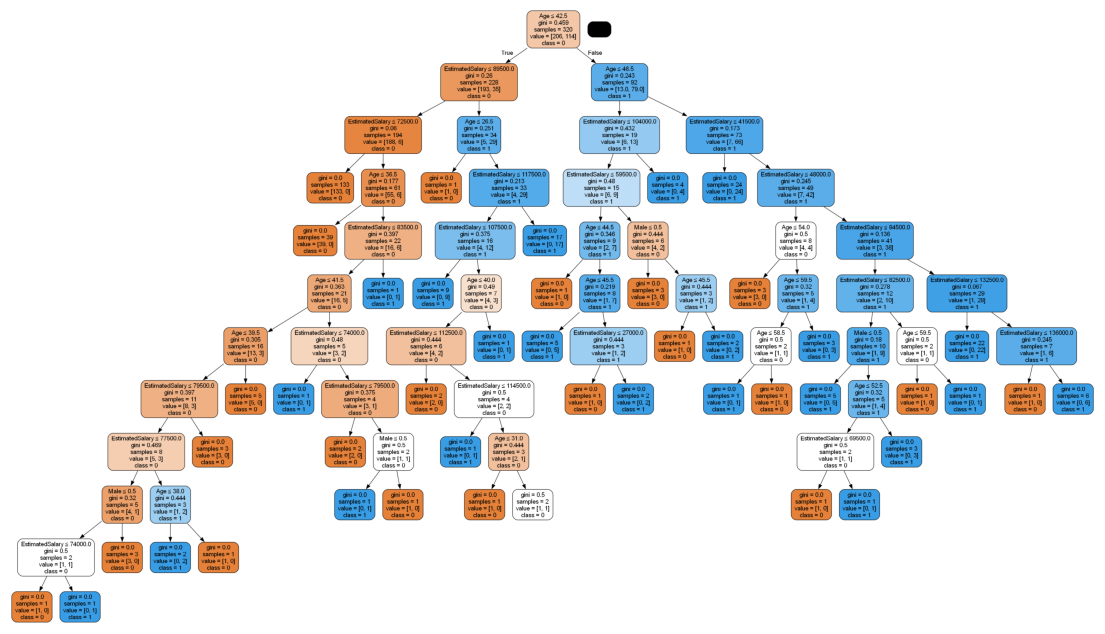

In [42]:
# Hi·ªÉn th·ªã ·∫£nh c√¢y (n·∫øu file ƒë∆∞·ª£c t·∫°o) ƒë·ªÉ ƒë·∫£m b·∫£o c√≥ output
if os.path.exists(png_path):
    photo = imageio.imread(png_path)
    plt.figure(figsize=(14,14))
    plt.imshow(photo)
    plt.axis('off')
    plt.show()

In [43]:
# D·ª± ƒëo√°n v√† ki·ªÉm th·ª≠
model = jlb.load(mdl_path)
y_pred = model.predict(x_test)

In [44]:
# So s√°nh k·∫øt qu·∫£
df_compare = pd.DataFrame({'Th·ª±c t·∫ø': y_test.values, 'D·ª± ƒëo√°n': y_pred})
print(df_compare.head(10))

print(f"\nS·ªë tr∆∞·ªùng h·ª£p d·ª± ƒëo√°n ƒê√öNG: {(y_pred == y_test).sum()}/{len(y_test)}")

   Th·ª±c t·∫ø  D·ª± ƒëo√°n
0        0        0
1        0        1
2        0        0
3        0        0
4        0        0
5        1        1
6        0        0
7        1        0
8        1        1
9        1        0

S·ªë tr∆∞·ªùng h·ª£p d·ª± ƒëo√°n ƒê√öNG: 67/80


In [45]:
# ----------------------------------------------------------
# 6. ƒê√°nh gi√°
# ----------------------------------------------------------
# C√°c ch·ªâ s·ªë chung (d√πng average='macro' cho ƒëa l·ªõp)
scores = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision (macro)': precision_score(y_test, y_pred, average='macro'),
    'Recall (macro)': recall_score(y_test, y_pred, average='macro'),
    'F1-score (macro)': f1_score(y_test, y_pred, average='macro')
}

print("\n=== üîç ƒê√ÅNH GI√Å M√î H√åNH Decision Tree (Iris) ===")
for name, val in scores.items():
    print(f"{name:20s}: {val*100:.2f}%")

print("\n=== üìä B√°o c√°o chi ti·∫øt ===")
print(classification_report(y_test, y_pred))



=== üîç ƒê√ÅNH GI√Å M√î H√åNH Decision Tree (Iris) ===
Accuracy            : 83.75%
Precision (macro)   : 82.33%
Recall (macro)      : 82.79%
F1-score (macro)    : 82.55%

=== üìä B√°o c√°o chi ti·∫øt ===
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        51
           1       0.77      0.79      0.78        29

    accuracy                           0.84        80
   macro avg       0.82      0.83      0.83        80
weighted avg       0.84      0.84      0.84        80




Ma tr·∫≠n nh·∫ßm l·∫´n:
 [[44  7]
 [ 6 23]]


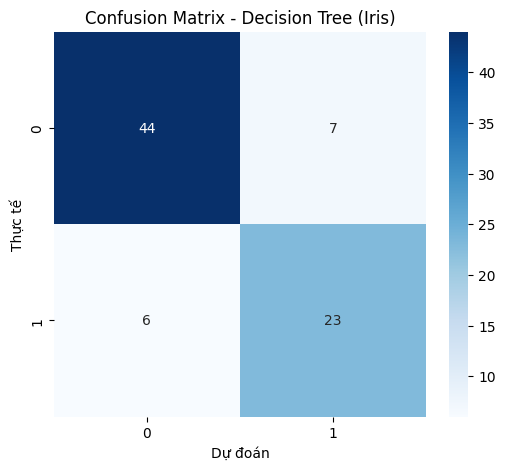

In [46]:
# Ma tr·∫≠n nh·∫ßm l·∫´n
cm = confusion_matrix(y_test, y_pred)
print("\nMa tr·∫≠n nh·∫ßm l·∫´n:\n", cm)

plt.figure(figsize=(6,5))
sbn.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Decision Tree (Iris)')
plt.xlabel('D·ª± ƒëo√°n')
plt.ylabel('Th·ª±c t·∫ø')
plt.show()


Feature importances:
 Age                0.564151
EstimatedSalary    0.414354
Male               0.021494
dtype: float64


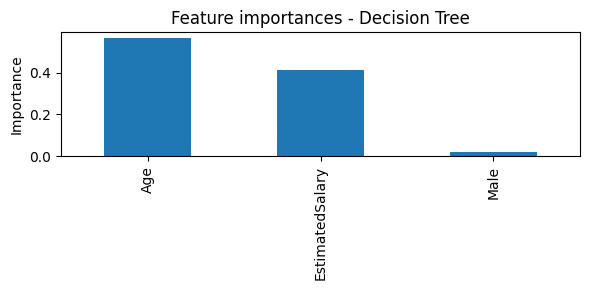

In [47]:
# Feature Importances
fi = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)
print("\nFeature importances:\n", fi)

plt.figure(figsize=(6,3))
fi.plot(kind='bar')
plt.title('Feature importances - Decision Tree')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [56]:
# ----------------------------------------------------------
# 9. V√≤ng l·∫∑p t∆∞∆°ng t√°c d·ª± ƒëo√°n m·∫´u ƒë∆°n l·∫ª (gi·ªØ giao di·ªán gi·ªëng ban ƒë·∫ßu)
# ----------------------------------------------------------
labels = np.array(['KH√îNG mua', 'MUA'])
model_load = jlb.load(mdl_path)

tiep = 'C'
while (tiep.upper() == 'C'):
    try:
        idx = int(input(f'Nh·∫≠p ch·ªâ s·ªë d√≤ng t·ª´ 0 ƒë·∫øn {len(x_test)-1} (ho·∫∑c -1 ƒë·ªÉ tho√°t): '))
        if idx == -1:
            break
        idx = idx % len(x_test)
        X_new = x_test.iloc[[idx]]
        y_pred_single = model_load.predict(X_new)
        print('M·∫´u', X_new.to_string(), end='')

        if np.issubdtype(type(y_pred_single[0]), np.integer):
            print('    ƒë∆∞·ª£c d·ª± ƒëo√°n l√†', labels[y_pred_single[0]])
        else:
            print('    ƒë∆∞·ª£c d·ª± ƒëo√°n l√†', y_pred_single[0])
    except Exception as ex:
        print("L·ªói nh·∫≠p li·ªáu ho·∫∑c ngo·∫°i l·ªá:", ex)
    tiep = input('Ti·∫øp t·ª•c (C/K) ? ')

M·∫´u     Age  EstimatedSalary  Male
75   34           112000     1    ƒë∆∞·ª£c d·ª± ƒëo√°n l√† KH√îNG mua
